# Clustering

In [24]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

import seaborn as sns


In [25]:
#importing data

db = pd.read_csv('data/player_stats_injuries.csv')

db.head()

,PLAYER_ID,PLAYER_NAME,SEASON,SEASON_NUM,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,GP,MIN,USG_PCT,...,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES,TEAM,INJURED ON,RETURNED,DAYS MISSED,INJURED_TYPE
0,1630639,A.J. Lawson,22-23,22.5,22.0,78,179,13,4.8,0.182,...,1.39,0.62,0.0,0.0,0.2,NaN,NaN,NaN,NaN,NaN
1,1631260,AJ Green,22-23,22.5,23.0,77,190,32,9.4,0.160,...,2.61,1.84,0.1,0.0,0.3,NaN,NaN,NaN,NaN,NaN
2,1631100,AJ Griffin,22-23,22.5,19.0,78,220,66,19.4,0.174,...,2.08,1.49,0.4,0.0,0.7,NaN,NaN,NaN,NaN,NaN
3,203932,Aaron Gordon,22-23,22.5,27.0,80,235,61,30.1,0.206,...,2.94,2.11,1.8,2.1,6.8,Nuggets,2023-02-02,2023-02-07,5.0,Sprained_ankle
4,1628988,Aaron Holiday,22-23,22.5,26.0,72,185,57,13.7,0.128,...,4.17,3.82,0.1,0.0,0.4,NaN,NaN,NaN,NaN,NaN


In [26]:
sns.set(style="whitegrid")

In [27]:
def evaluate_k_range(features, max_k=10):
    # Step 1: Extract and clean relevant columns
    data = db[features].copy()
    data = data.replace(['None', ' none', 'None ', ' none ', ' NONE', 'NONE', ' None'], pd.NA)

    # Step 2: Convert all to numeric (non-numeric strings become NaN)
    for col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # Step 3: Drop rows with missing values
    data = data.dropna()

    # Step 4: Scale the clean data
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data)

    # Step 5: Evaluate WCSS and silhouette scores
    wcss = []
    silhouette_scores = []
    Ks = range(2, max_k + 1)

    for k in Ks:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(scaled)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(scaled, labels))

    # Step 6: Plot Elbow & Silhouette
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(Ks, wcss, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS (Inertia)')
    plt.title('Elbow Method for Optimal k')

    plt.subplot(1, 2, 2)
    plt.plot(Ks, silhouette_scores, 'go-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for k')

    plt.tight_layout()
    plt.show()


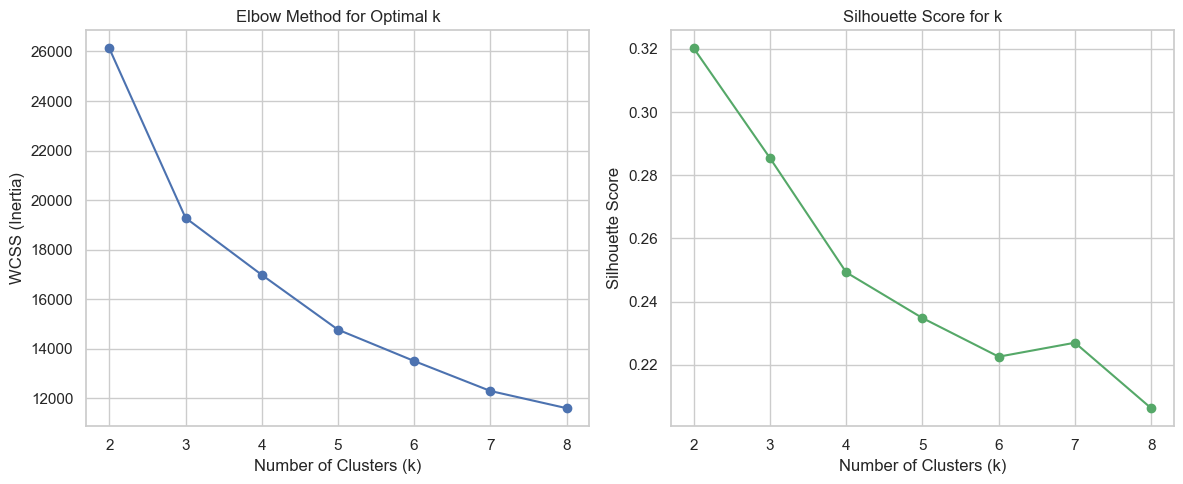

In [28]:
evaluate_k_range(segmentation_features, max_k=8)


In [29]:
def run_clustering(features, k=4, title="Clustering"):
  # Step 1: Extract relevant features
    data = db[features].copy()

    # Step 2: Replace string 'None', ' none', or similar with actual NaN
    data = data.replace(['None', ' none', 'None ', ' none ', ' NONE', 'NONE', ' None'], pd.NA)

    # Step 3: Convert all columns to numeric, coercing errors (invalid strings → NaN)
    for col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # Step 4: Drop rows with NaNs
    data = data.dropna()

    # Scale features
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data)

    # K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled)

    # PCA for visualization
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(scaled)

    # Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=clusters, palette="viridis")
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Cluster")
    plt.show()

    # Return original data with cluster labels
    result = data.copy()
    result['Cluster'] = clusters
    return result

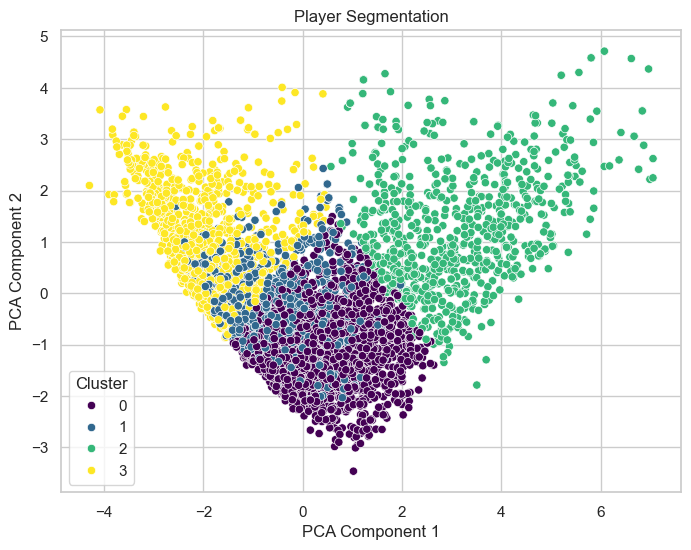

In [30]:
# 1. Player Segmentation: Based on physical attributes and playing style
segmentation_features = [
    'AGE', 'PLAYER_HEIGHT_INCHES', 'PLAYER_WEIGHT', 'DRIVES', 'DRIVE_FGA',
    'PULL_UP_FGA', 'PAINT_TOUCHES'
]
player_segments = run_clustering(segmentation_features, k=4, title="Player Segmentation")


In [31]:
# 2. Injury Pattern Identification: Based on injury frequency & related stats
injury_features = [
    'AGE', 'MIN', 'GP', 'INJURED_TYPE',  # assuming 'INJURY' is a binary or count column
    'DIST_MILES'
]
injury_patterns = run_clustering(injury_features, k=3, title="Injury Pattern Clustering")

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.

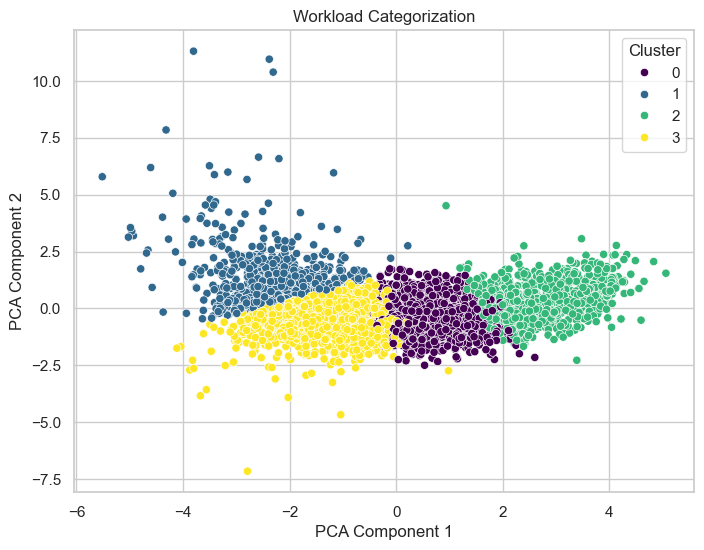

In [ ]:
# 3. Workload Categorization: Based on intensity and minutes
workload_features = [
    'MIN', 'USG_PCT', 'FGA_PG', 'PACE', 'DIST_MILES'
]
workload_clusters = run_clustering(workload_features, k=4, title="Workload Categorization")

In [ ]:
optimal_k = 4  # Example value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

db['Cluster'] = clusters  # Append cluster labels to original data

In [ ]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title('Player Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
